## Setup

### Imports

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

### Notebook settings

In [2]:
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_colwidth', None)

sns.set_theme(style='white', palette='Blues_r')

### Functions

In [3]:
#plot boxplot
def boxplot_(df, x, y, title, x_label, y_label, color='blue', target_var=False, hue=None, ticks=None, show_leg = False):
    if target_var == True:
        color = 'black'
    plt.subplots(figsize=(10,5))
    sns.boxplot(data=df, x=x, y=y, hue=hue, color=color)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xticks(list(range(len(ticks))),ticks)
    plt.title(title)
    plt.legend().remove()
    plt.show()
    if show_leg == True:
        plt.legend(loc='best')

# plot scatterplot
def scatter_(df, x, y, title, x_label, y_label, color='blue', target_var=False, hue=None, show_leg = False):
    if target_var == True:
        color = 'black'
    plt.show()
    plt.subplots(figsize=(10,5))
    sns.scatterplot(data=df, x=x, y=y, hue=hue)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend().remove()
    if show_leg == True:
        plt.legend(loc='best')

# plot timeseries plot
def timeseries_plot(df, x, xlabel, y, ylabel, color='blue', target_var=False, existing_ax=None):
    if target_var == True:
        color = 'black'
    if existing_ax == None:
        fig, ax = plt.subplots(figsize=(10,5))
    else:
        ax = existing_ax
    sns.lineplot(df, x=x, y=y, color=color, label=y)
    ax.set(title=f"{ylabel} over time", xlabel=xlabel, ylabel=ylabel, label=y.replace("_"," "))
    plt.legend(loc='best')

# function for adf test
def dickeyFullerTest(df):
    for column in df.columns:
        result = adfuller(df[column])
        # print(f"Column: {column}, ADF statistic: {result[0]}, p-value: {result[1]}")
        # for key, value in result[4].items():
        #     print(f"Critical value ({key}): {value}")
        if (result[1] < 0.05) &  (result[4]['1%'] > result[0]):
            print(f'{column} is stationary')
        else:
            print(f'{column} is not stationary')




from mpl_toolkits.axes_grid1 import host_subplot

# plot duel times series
def plot_dual_axis_timeseries(df, y1, y2, ylabel1, ylabel2, color1="blue", color2="black"):
    fig, axi = plt.subplots(figsize=(10,5))
    ax = host_subplot(111) # subplot(nrows, ncols, plot_number)
    ax0 = ax.twinx()
    ax1 = sns.lineplot(data=df, x=df.index, y=y1, ax=ax, color=color1, label=ylabel1, legend=False)
    ax2 = sns.lineplot(data=df, x=df.index, y=y2, ax=ax0, color=color2, label=ylabel2, legend=False)
    axi.set(xticks=[], yticks=[])
    ax1.set(ylabel=ylabel1, title=f"{ylabel1} and {ylabel2} over time")
    ax0.set(ylabel=ylabel2)
    ax.legend()
    ax.yaxis.get_label()
    ax.yaxis.get_label()


# annotate and vertical line
def annotate_and_line(x=None, y=None, color="red", linestyle="--", annotation=None, vertical_line=False, time_series=False, annot_x=None):    
    if time_series:
        x=pd.to_datetime(x)
        annot_x = pd.to_datetime(annot_x)
    if vertical_line:    
        plt.axvline(x, color=color, linestyle=linestyle)
    if annot_x:
        x = annot_x
    if annotation:
        plt.annotate(annotation, xy=(x, y), color=color)


# Corr bar plot
def corr_bar(df, title, y_label, group, var_comp):
    data = df.corr()[var_comp]
    plt.figure(figsize=(10,5))
    data[group].sort_values().plot(kind='bar', color='blue')
    plt.title(title)
    plt.ylabel(y_label)
    plt.show()


# Histogram and boxplot (and skew output)
def den_hist_boxplot(data, features, bins, target_var=False, color='blue'):
    for col in features:
        if target_var == True:
            color = 'black'
    print(f'{col} skew: {round(data[col].skew(), 2)}')
    plt.figure(figsize = (15,5))
    plt.subplot(1, 2, 1)
    sns.histplot(data = data, data[col], bins=bins, stat='density', kde=True, color=color)
    plt.xticks(rotation=90)
    plt.ticklabel_format(style='plain')
    plt.title(f'Density Histogram of {col}')
    plt.subplot(1, 2, 2)
    sns.boxplot(data = data, x=data[col], color=color)
    plt.title(f'Boxplot of {col}')
    plt.xticks(rotation=90)


# Histogram
def histogram_plot(df, x, xlabel, bin_edges, stat='density', kde=True, color='blue', target_var=False, xrange=None, yrange=None):
    if target_var == True:
        color = 'black'
    fig, ax = plt.subplots(figsize = (10, 5))
    sns.histplot(data=df, x=x, stat=stat, kde=kde, bins=bin_edges, color=color)
    ax.set(title=f'{xlabel} Overall Distribution', xlabel=xlabel, xlim=xrange, ylim=yrange);

# Multiple annotation on a graph with arrow
def annotate_graph (text, xdate, y, xtext, ytext):
    plt.annotate(text, xy =((pd.to_datetime(xdate)), y), xytext =(pd.to_datetime(xtext), ytext),  
                arrowprops = dict(facecolor = 'blue', shrink = 0.05, headwidth = 7, headlength = 7),
                fontsize= 8)

# Correlation heatmap
def correlation_heat_map(df, title, method="pearson", vmin=-1, vmax=1):
    col_names = [col.replace("_", " ") for col in df.columns]
    ax = sns.heatmap(df.corr(method=method), annot=True, fmt=".2f", xticklabels=col_names, yticklabels=col_names, cmap="coolwarm", vmin=vmin, vmax=vmax)
    ax.set(title=title)

## Reading in data

In [4]:
df_weeks_wait_CT = pd.read_csv('../05.output/weeks_wait.csv')
df_weeks_wait = pd.read_excel(
    '../04.input/Weeks Wait by Diagnostic Sub-Category.xlsx', header=1)
df_forecast_capacity_future = pd.read_csv('../05.output/forecast_capacity_future.csv', index_col='Unnamed: 0')
df_forecast_capacity_future['date'] = pd.to_datetime(df_forecast_capacity_future['date'])
df_merged_forecast = pd.read_csv('../05.output/merged_forecast.csv', index_col='Unnamed: 0')
df_test_ct_mins = pd.read_csv('../05.output/test_ct_mins.csv', index_col='Unnamed: 0')
df_test_capacity = pd.read_csv('../05.output/test_capacity.csv', index_col='Unnamed: 0')

## Univariate Analysis

### Weeks_wait

#### Complete data (Weeks Wait by Diagnostic Sub-Category)
19 sub-catergories of diagnostic of which CT Cardio and CT reference CT.

CT and CT Cardiac have 5171 and 364 instances, combining to a total of 5535 instances.

Of the total instances of 28874, CT related instances make up 19.2% (1.3% CT Cardio and 17.9 CT).

#### CT data (weeks_wait)
There are 124 different diagnostic decriptions.

There are 37 wait bands sequentially numbered 1 to 32, then 37, 42, 45 and 50.
 - Largest is band 1 21.8%
 - instances within each band get less as the band get larger
 - bands greater than 13 have less than 100 instances (<1% of total per band)

In [5]:
df_weeks_wait.head(2)

,Diagnostic Sub-Category,Diagnostic Description,Count of Diagnostics_ID,Current_Wait_band
0,Barium Enema,Endoscopic US pancreas,1,2
1,Barium Enema,Endoscopic US pancreas,1,19


In [6]:
df_weeks_wait.groupby(['Diagnostic Sub-Category'])['Count of Diagnostics_ID'].sum()

Diagnostic Sub-Category
Barium Enema                          4
CT                                 5171
CT Cardiac                          364
Cardiac MRI                         215
Colon                              2471
Cystoscopy                          524
Dexa                               1465
EMG                                 244
Echocardiography                   1012
Electrophysiology                     1
Flexi                              1061
MRI                                8950
Non Obstetric Ultrasound           2883
Non Obstetric Ultrasound Breast     818
OGD                                2778
Paed Audiology                      447
Paediatric Gastroenterology          10
Sleep Studies                       399
Urodynamics Gynae                    57
Name: Count of Diagnostics_ID, dtype: int64

In [7]:
df_weeks_wait['Count of Diagnostics_ID'].sum()

28874

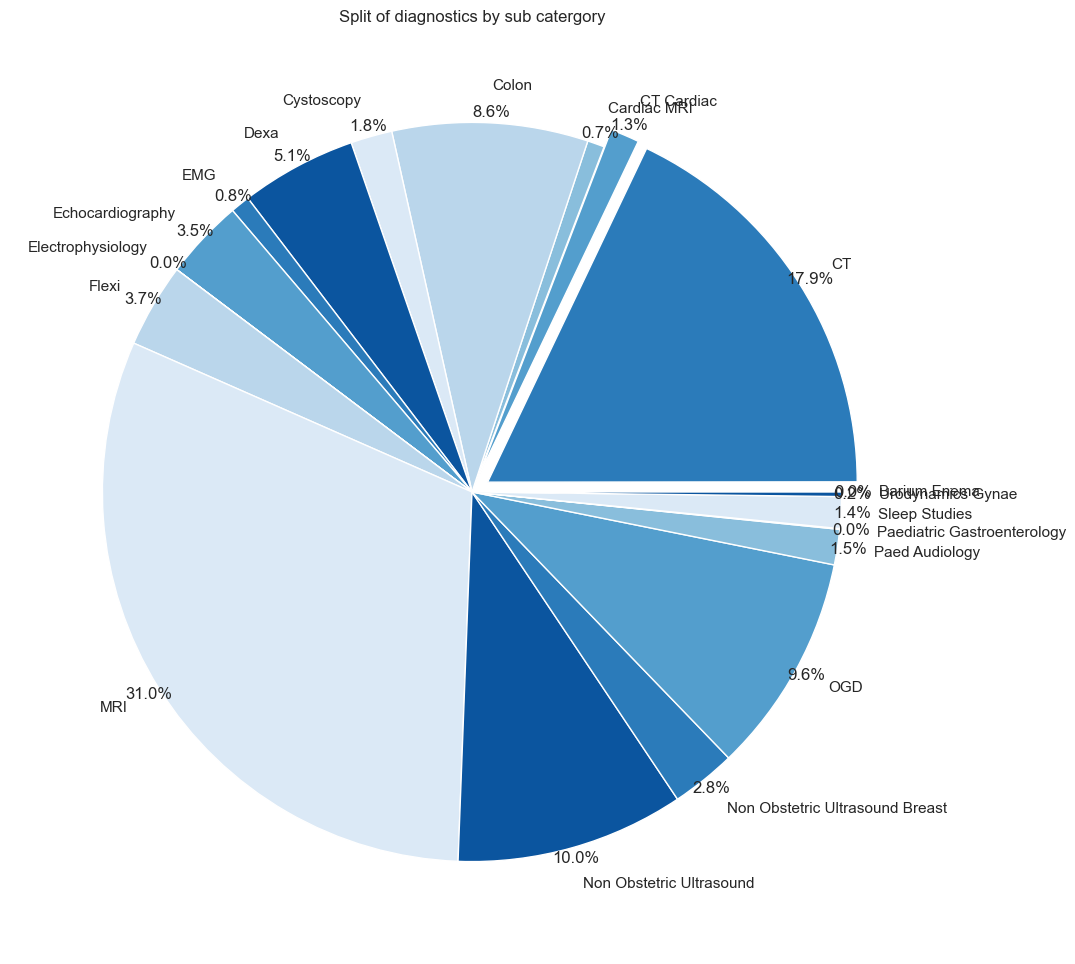

In [8]:
df_weeks_wait_grouped = df_weeks_wait.groupby(['Diagnostic Sub-Category'])['Count of Diagnostics_ID'].sum()
explode = (0,0.05,0.05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)
fig, ax = plt.subplots(figsize = (18,12))
ax.pie(df_weeks_wait_grouped, labels = df_weeks_wait_grouped.index, autopct='%1.1f%%', pctdistance=1.03, explode = explode)
ax.set_title('Split of diagnostics by sub catergory');

In [9]:
df_weeks_wait_grouped.info()

<class 'pandas.core.series.Series'>
Index: 19 entries, Barium Enema to Urodynamics Gynae
Series name: Count of Diagnostics_ID
Non-Null Count  Dtype
--------------  -----
19 non-null     int64
dtypes: int64(1)
memory usage: 860.0+ bytes


In [10]:
df_weeks_wait_CT.columns

Index(['Unnamed: 0', 'diagnostic_sub_category', 'diagnostic_description',
       'count_of_diagnostics_id', 'current_wait_band'],
      dtype='object')

In [11]:
df_weeks_wait_CT.groupby(['current_wait_band'])['count_of_diagnostics_id'].sum()

current_wait_band
0      102
1     1209
2      964
3      656
4      343
5      209
6      697
7      280
8      305
9      136
10     149
11     112
12     105
13      47
14      29
15      24
16      38
17      13
18      16
19      14
20      26
21      12
22      18
23       6
24       2
25       7
26       3
27       1
28       1
29       2
30       2
31       1
32       1
37       1
42       1
45       2
50       1
Name: count_of_diagnostics_id, dtype: int64

In [12]:
df_weeks_wait_CT.groupby(['diagnostic_description'])['count_of_diagnostics_id'].sum()

diagnostic_description
CT Abdomen                              17
CT Abdomen and pelvis                   45
CT Abdomen and pelvis with contrast    401
CT Abdomen with contrast               189
CT Adrenal Both                         21
                                      ... 
CT Whole body                            5
CT Whole body with contrast              1
CT Whole spine                           3
CT Wrist Lt                              7
CT Wrist Rt                              7
Name: count_of_diagnostics_id, Length: 124, dtype: int64

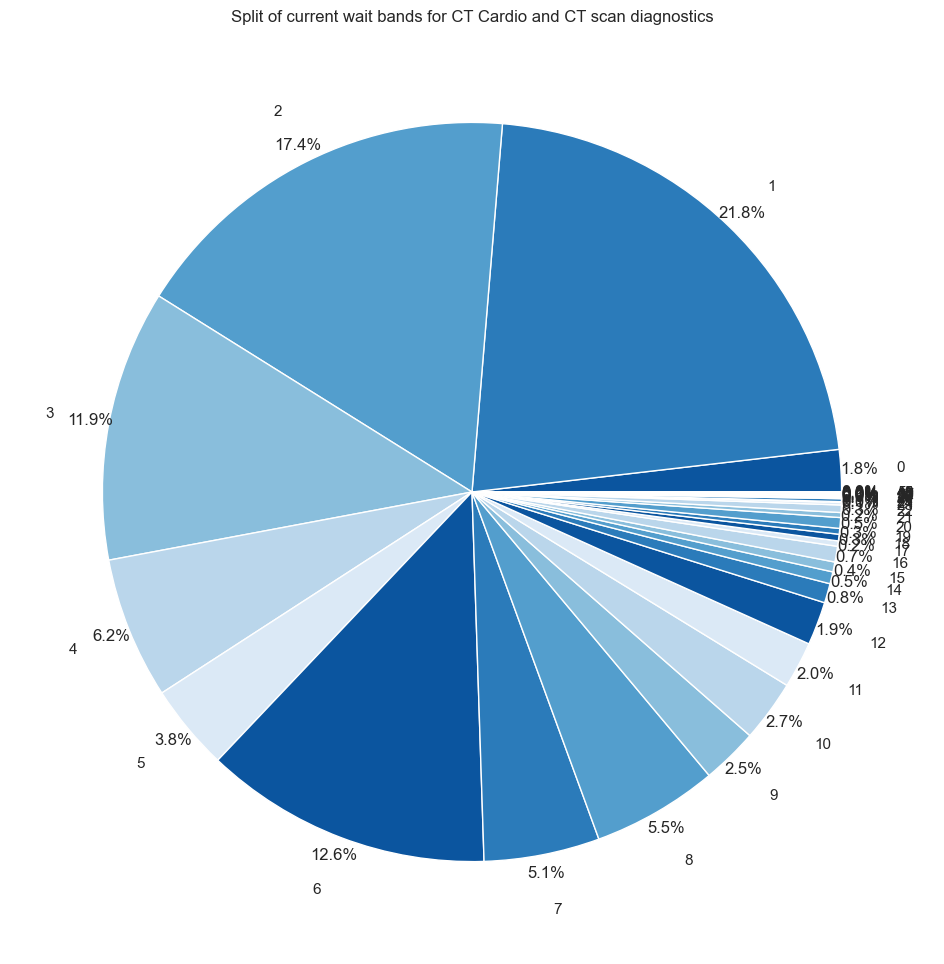

In [13]:
df_weeks_wait_CT_grouped = df_weeks_wait_CT.groupby(['current_wait_band'])['count_of_diagnostics_id'].sum()
fig, ax = plt.subplots(figsize = (18,12))
ax.pie(df_weeks_wait_CT_grouped, labels = df_weeks_wait_CT_grouped.index, autopct='%1.1f%%', labeldistance = 1.15, pctdistance=1.05)
ax.set_title('Split of current wait bands for CT Cardio and CT scan diagnostics');

In [14]:
df_weeks_wait_CT.columns

Index(['Unnamed: 0', 'diagnostic_sub_category', 'diagnostic_description',
       'count_of_diagnostics_id', 'current_wait_band'],
      dtype='object')

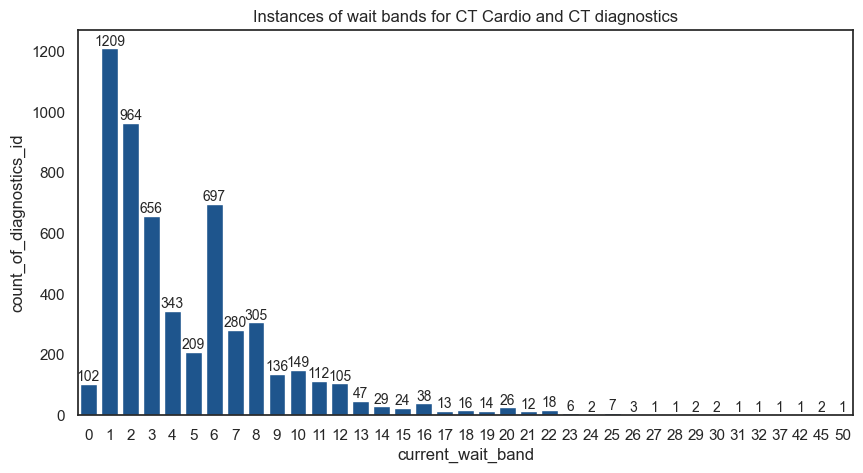

In [15]:
fig, ax = plt.subplots(figsize = (10,5))
ax = sns.barplot(df_weeks_wait_CT, x="current_wait_band", y="count_of_diagnostics_id", errorbar=None, estimator='sum')
ax.set_title('Instances of wait bands for CT Cardio and CT diagnostics')
ax.bar_label(ax.containers[0], fontsize=10);
#ax.set_yaxis;

### Merged Forecast Dataframe

#### Reviewing dataframe

In [16]:
df_merged_forecast.head()

,date,breaches,new_demand_x,waiting_list,grand_total,sum_of_new_demand_forecast,new_demand_y,capacity,activity_%_of_capacity_(90%),in_week_unmet_demand,cumulative_unmet_demand,backlog,backlog_change,cumulative_backlog_change,percentage_increase
0,2019-09-15,31,NaN,1249,2530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-09-22,31,NaN,1250,2531,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-09-29,30,NaN,1254,2539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-10-06,31,NaN,1265,2561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-10-13,33,NaN,1277,2588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df_merged_forecast.info()

<class 'pandas.core.frame.DataFrame'>
Index: 316 entries, 0 to 315
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   date                          316 non-null    object 
 1   breaches                      316 non-null    int64  
 2   new_demand_x                  184 non-null    float64
 3   waiting_list                  316 non-null    int64  
 4   grand_total                   316 non-null    int64  
 5   sum_of_new_demand_forecast    184 non-null    float64
 6   new_demand_y                  21 non-null     float64
 7   capacity                      21 non-null     float64
 8   activity_%_of_capacity_(90%)  21 non-null     float64
 9   in_week_unmet_demand          21 non-null     float64
 10  cumulative_unmet_demand       21 non-null     float64
 11  backlog                       21 non-null     float64
 12  backlog_change                21 non-null     float64
 13  cumulative

In [18]:
# Converting date column to datatime
df_merged_forecast['date'] = pd.to_datetime(df_merged_forecast['date'])

In [19]:
df_merged_forecast.describe()

,date,breaches,new_demand_x,waiting_list,grand_total,sum_of_new_demand_forecast,new_demand_y,capacity,activity_%_of_capacity_(90%),in_week_unmet_demand,cumulative_unmet_demand,backlog,backlog_change,cumulative_backlog_change,percentage_increase
count,316,316.000000,184.000000,316.000000,316.000000,184.000000,21.000000,21.0,21.0,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,2022-09-27 05:41:46.329113856,482.322785,1136.467391,2331.462025,5807.477848,1122.771739,1148.428571,1272.0,1145.0,3.428571,381.095238,8891.000000,375.428571,4391.000000,0.975778
min,2019-09-15 00:00:00,30.000000,697.000000,576.000000,1247.000000,907.000000,957.000000,1272.0,1145.0,-188.000000,72.000000,4500.000000,0.000000,0.000000,0.000000
25%,2021-03-26 06:00:00,254.750000,1078.250000,1618.000000,3542.500000,1065.250000,1098.000000,1272.0,1145.0,-47.000000,244.000000,6348.000000,244.000000,1848.000000,0.410667
50%,2022-09-28 12:00:00,452.000000,1141.500000,1875.500000,5164.000000,1120.000000,1176.000000,1272.0,1145.0,31.000000,382.000000,9256.000000,382.000000,4756.000000,1.056889
75%,2024-04-01 18:00:00,684.750000,1200.250000,2943.750000,7715.750000,1188.000000,1198.000000,1272.0,1145.0,53.000000,537.000000,11402.000000,537.000000,6902.000000,1.533778
max,2025-10-05 00:00:00,1290.000000,1304.000000,5125.000000,12274.000000,1304.000000,1304.000000,1272.0,1145.0,159.000000,699.000000,12384.000000,699.000000,7884.000000,1.752000
std,NaN,293.766277,87.902697,1112.800541,2858.024762,84.439535,88.672189,0.0,0.0,88.672189,187.718913,2790.252121,197.564311,2790.252121,0.620056


In [20]:
df_merged_forecast['date'].unique()

<DatetimeArray>
['2019-09-15 00:00:00', '2019-09-22 00:00:00', '2019-09-29 00:00:00',
 '2019-10-06 00:00:00', '2019-10-13 00:00:00', '2019-10-20 00:00:00',
 '2019-10-27 00:00:00', '2019-11-03 00:00:00', '2019-11-10 00:00:00',
 '2019-11-17 00:00:00',
 ...
 '2025-08-03 00:00:00', '2025-08-10 00:00:00', '2025-08-17 00:00:00',
 '2025-08-24 00:00:00', '2025-08-31 00:00:00', '2025-09-07 00:00:00',
 '2025-09-14 00:00:00', '2025-09-21 00:00:00', '2025-09-28 00:00:00',
 '2025-10-05 00:00:00']
Length: 316, dtype: datetime64[ns]

- Data covers timeframe from 2019-09-15 to 2025-10-05 (therefore some is forecast data)
- There is a row of data for each week within this timeframe (there are 316 weeks between the min and max dates, so no weekly dates are missing)
- Only breaches, waiting_list and grand_total cover the full time period

#### Revewing breaches variable

breaches skew: 0.41


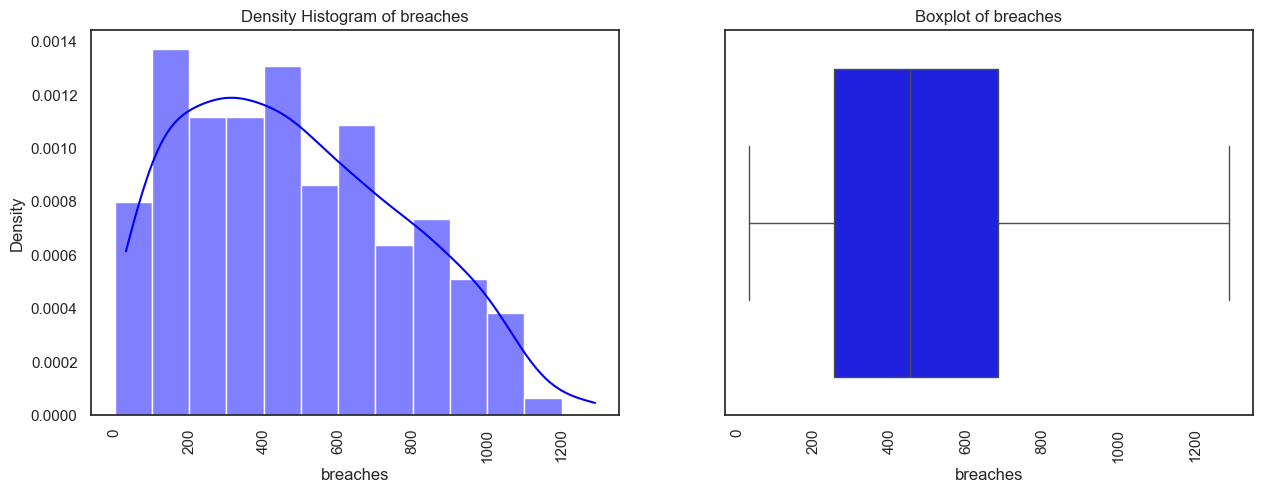

In [21]:
bin_edges = list(range(0, 1300, 100))
den_hist_boxplot(df_merged_forecast, ['breaches'], bins=bin_edges, target_var=False, color='blue')

- The breaches distribution has positive skew (0.41) with a range from 30 to 1290, a median of 452, and a mean of 482

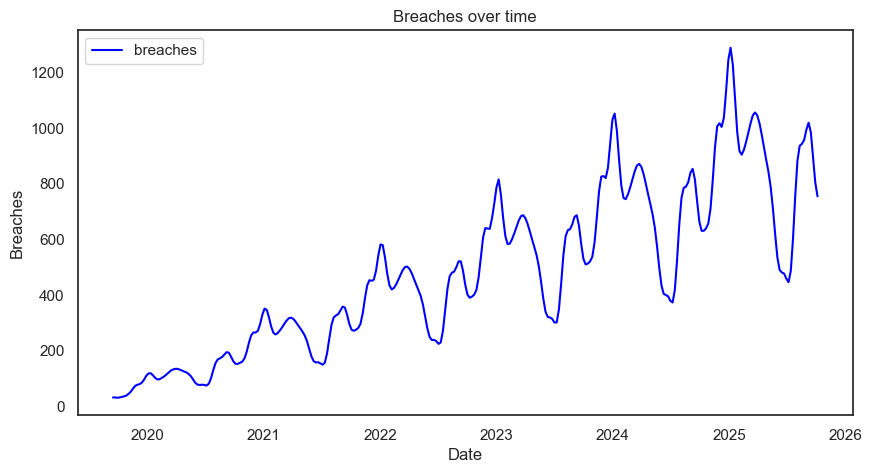

In [22]:
timeseries_plot(df_merged_forecast, x='date', y='breaches', xlabel='Date', ylabel='Breaches', color='blue', target_var=False, existing_ax=None)

- This is interesting, as there appears to be some seasonality to the number of breaches that occur
- It is also apparent that breaches have been rising year-on-year and this trend is predicted to continue according to the forecasting that has already been done

#### Reviewing waiting list variable

waiting_list skew: 0.86


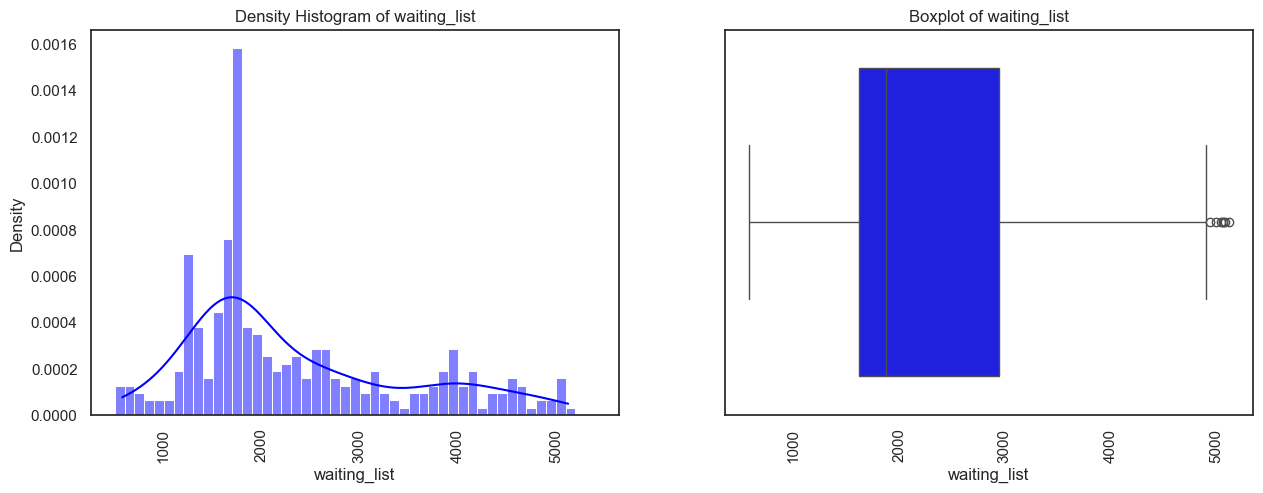

In [23]:
bin_edges = list(range(500, 5500, 100))
den_hist_boxplot(df_merged_forecast, ['waiting_list'], bins=bin_edges, target_var=False, color='blue')

- The waiting list distribution has positive skew (0.86) with a range from 576 to 5125, a median of 1875.5, and a mean of 2331

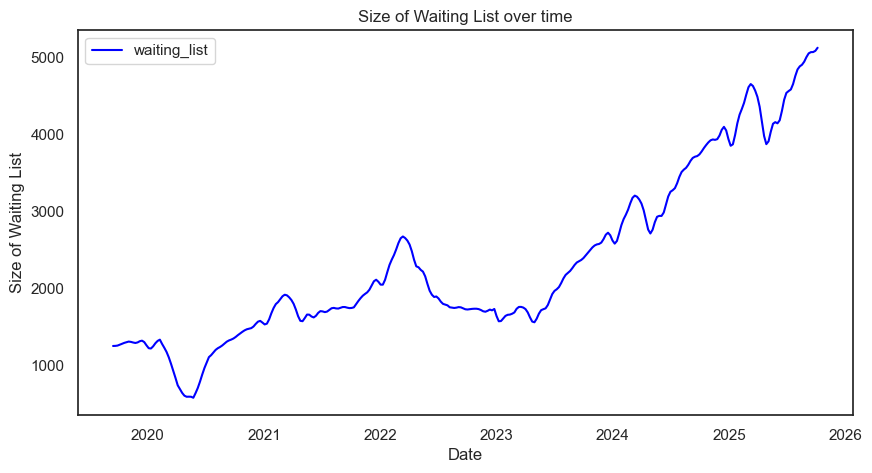

In [24]:
timeseries_plot(df_merged_forecast, x='date', y='waiting_list', xlabel='Date', ylabel='Size of Waiting List', color='blue', target_var=False, existing_ax=None)

- The forecasting for waiting list is interesting, as the time series shows a decreasing waiting list throughout 2022, but then a rapidly increasing waiting list from 2023 onwards
- Seasonality isn't as clear for waiting list as it is for breaches, but there does appear to be peak at the beginning of each year (not as evident in 2023 though)

#### Reviewing grand_total variable

grand_total skew: 0.58


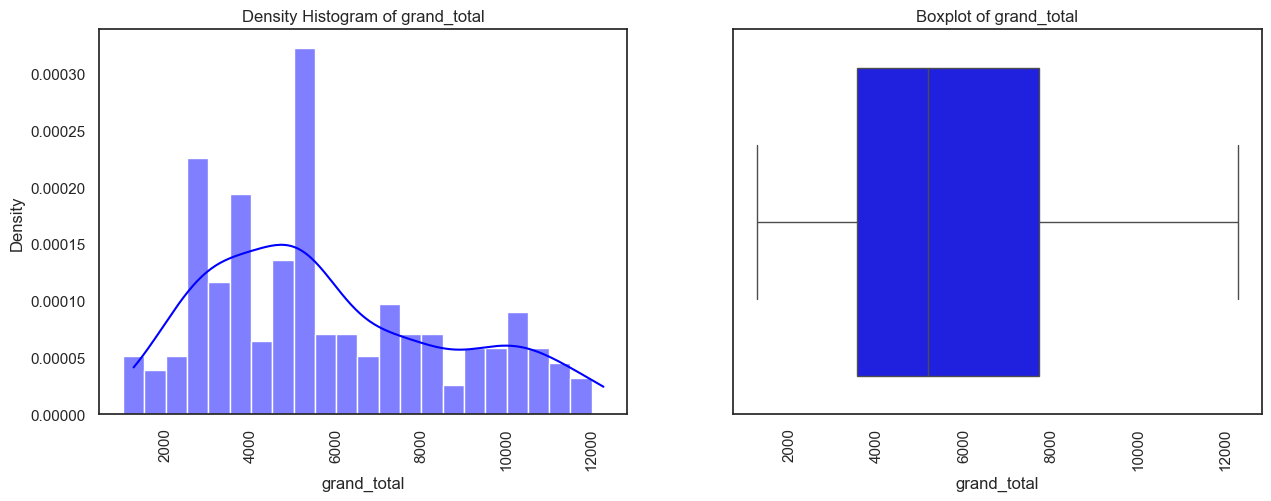

In [25]:
bin_edges = list(range(1000, 12500, 500))
den_hist_boxplot(df_merged_forecast, ['grand_total'], bins=bin_edges, target_var=False, color='blue')

- The grand total distribution has positive skew (0.58) with a range from 1247 to 12274, a median of 5164, and a mean of 5807

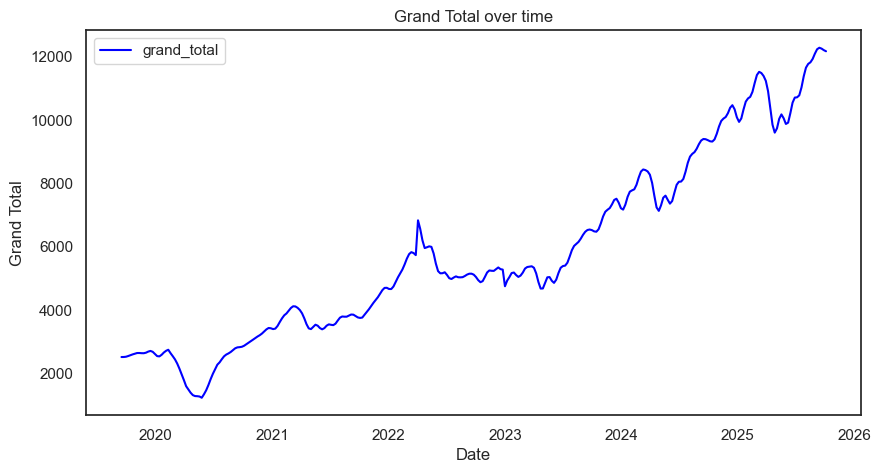

In [26]:
timeseries_plot(df_merged_forecast, x='date', y='grand_total', xlabel='Date', ylabel='Grand Total', color='blue', target_var=False, existing_ax=None)

- Grand total generally increasing over time with some evidence of seasonality (although this is more prominent in the forecasted period than the historical period)

### Time series from `forecast_capacity_future.csv` 

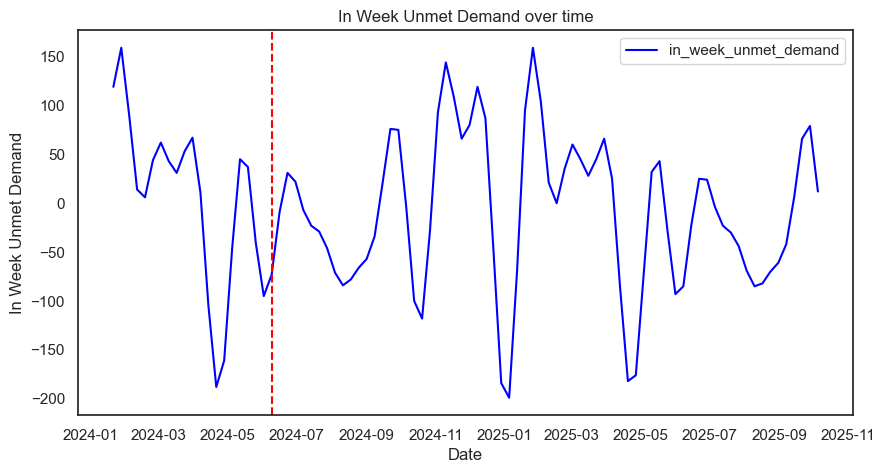

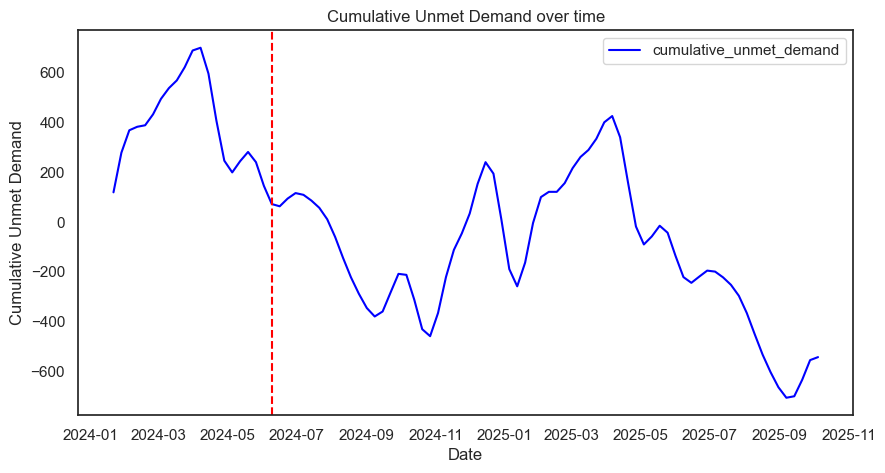

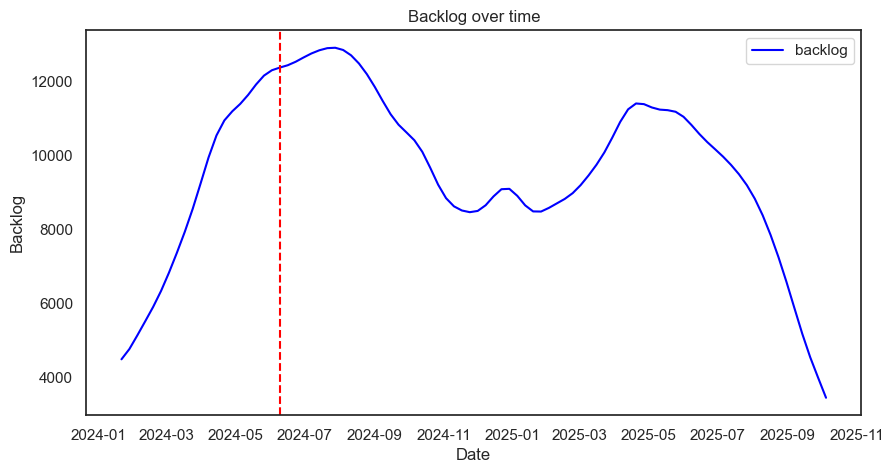

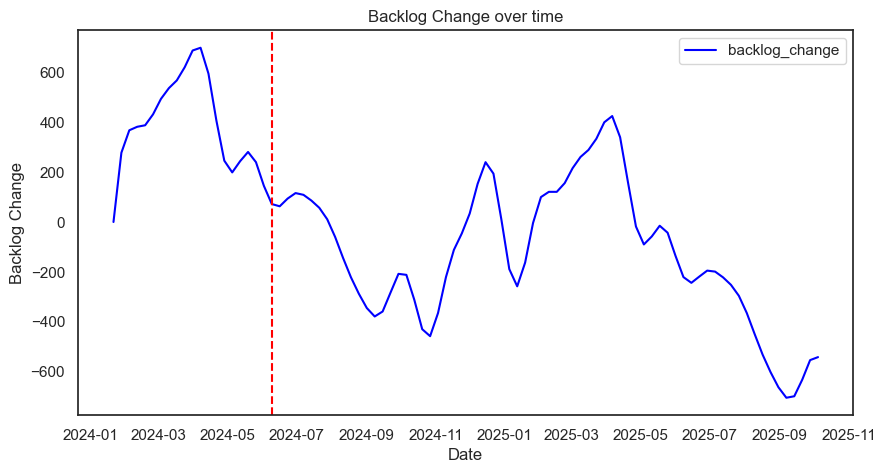

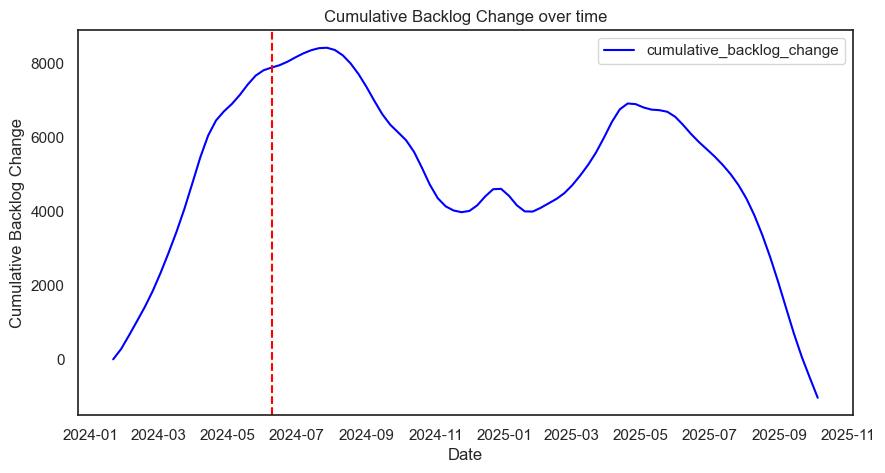

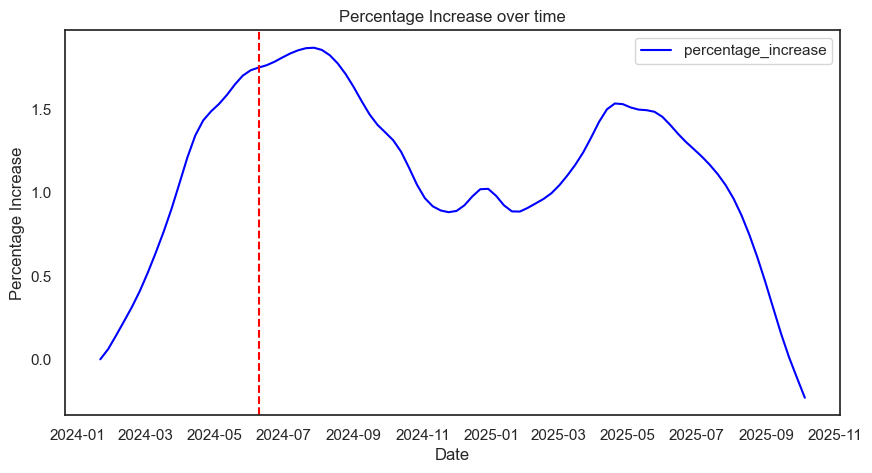

In [27]:
# See how the features in forecast cpacity future cahnge over time
for feature in df_forecast_capacity_future.columns.tolist()[4:]:
    timeseries_plot(df_forecast_capacity_future, 'date', 'Date', feature, feature.replace("_", " ").title())
    annotate_and_line(x='2024-06-09', vertical_line=True, time_series=True)

### CT_Mins dataset

In [28]:
df_test_ct_mins

,machine,week_1_x,week_1_y,week_2_x,week_2_y,week_3_x,week_3_y,week_4_x,week_4_y,week_5_x,week_5_y,week_6_x,week_6_y,week_7_x,week_7_y
0,1,240,480,240,480,240,480,240,480,240,480,240,480,240,480
1,2,195,480,195,480,195,480,195,480,195,480,195,480,195,480
2,3,220,460,220,460,220,460,220,460,220,460,220,460,220,460
3,4,180,420,180,420,180,420,180,420,180,420,180,420,180,420
4,5,195,480,195,480,195,480,195,480,195,480,195,480,195,480
5,6,196,436,196,436,196,436,196,436,196,436,196,436,196,436


In [29]:
df_test_ct_mins.columns.tolist()

['machine',
 'week_1_x',
 'week_1_y',
 'week_2_x',
 'week_2_y',
 'week_3_x',
 'week_3_y',
 'week_4_x',
 'week_4_y',
 'week_5_x',
 'week_5_y',
 'week_6_x',
 'week_6_y',
 'week_7_x',
 'week_7_y']

In [30]:
df_test_ct_mins.shape

(6, 15)

In [31]:
df_test_ct_mins.dtypes

machine     int64
week_1_x    int64
week_1_y    int64
week_2_x    int64
week_2_y    int64
week_3_x    int64
week_3_y    int64
week_4_x    int64
week_4_y    int64
week_5_x    int64
week_5_y    int64
week_6_x    int64
week_6_y    int64
week_7_x    int64
week_7_y    int64
dtype: object

In [32]:
df_test_ct_mins.nunique()

machine     6
week_1_x    5
week_1_y    4
week_2_x    5
week_2_y    4
week_3_x    5
week_3_y    4
week_4_x    5
week_4_y    4
week_5_x    5
week_5_y    4
week_6_x    5
week_6_y    4
week_7_x    5
week_7_y    4
dtype: int64

All Week_x have 5 unique observations.
All Week_y have 4 unique observations. 

In [33]:
# define function to create scatterplots
def strip_plots (x, y, df):
    # for loop to go through each variable, and provide counter
    for i, col in enumerate(y):
        plt.figure(i)
        sns.set_theme(style='white', rc={'figure.figsize':(6,3)})
        ax = sns.stripplot(x=x, y=col, data=df, palette='Blues_r')
        plt.title(f'Stripplot of Machine number vs {col}')
        plt.ylabel(f'{col}')

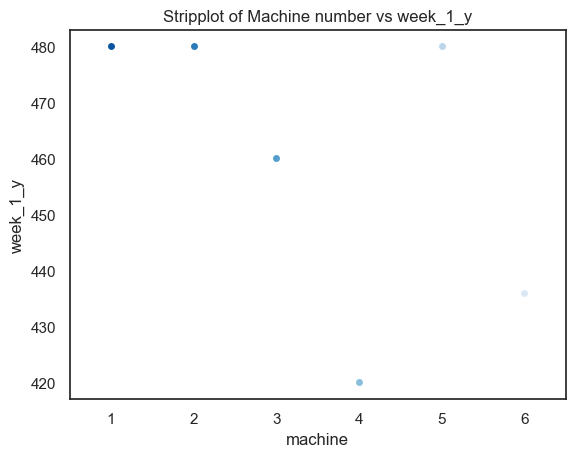

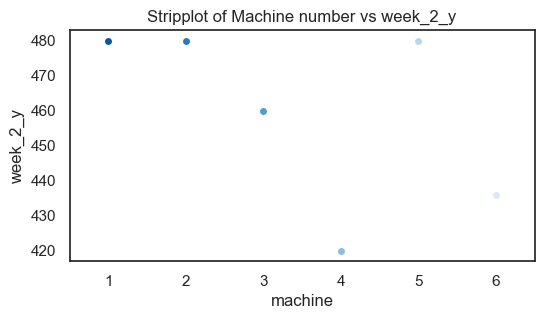

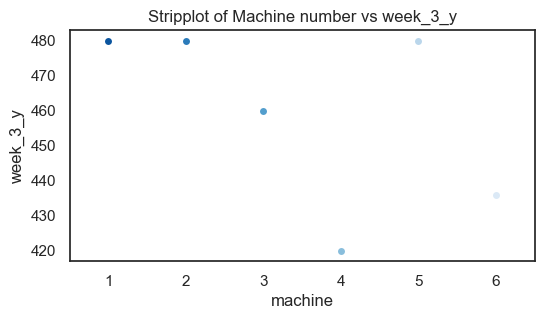

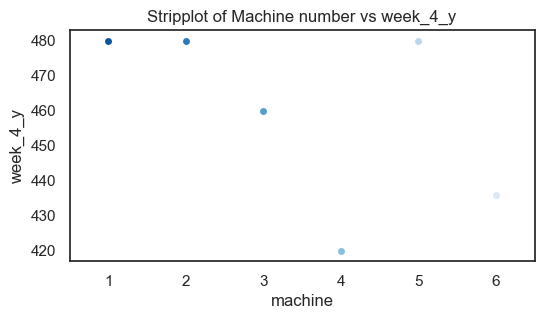

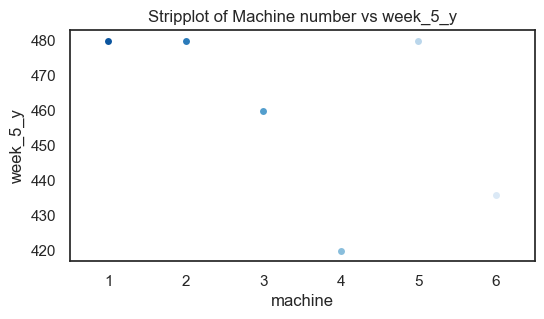

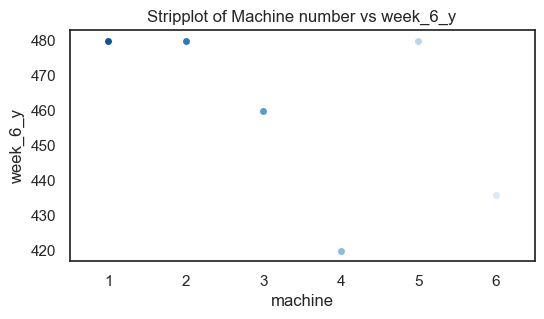

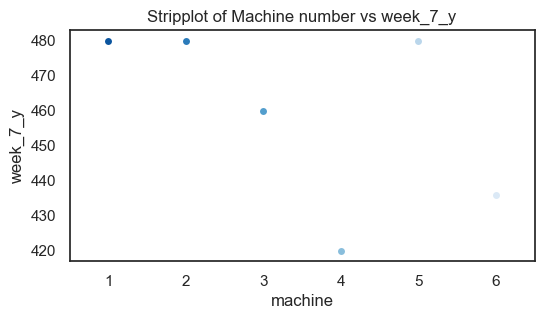

In [34]:
# col names with dependant var removed
y = df_test_ct_mins.columns[[2]].tolist() + df_test_ct_mins.columns[[4]].tolist() + df_test_ct_mins.columns[[6]].tolist() + df_test_ct_mins.columns[[8]].tolist() + df_test_ct_mins.columns[[10]].tolist() + df_test_ct_mins.columns[[12]].tolist() + df_test_ct_mins.columns[[14]].tolist()
# col name of dependant var
x = df_test_ct_mins.columns[0]
strip_plots(x, y, df_test_ct_mins)

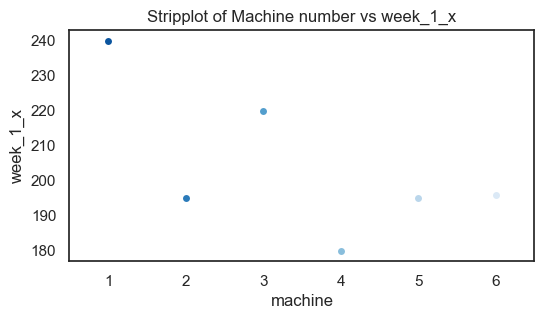

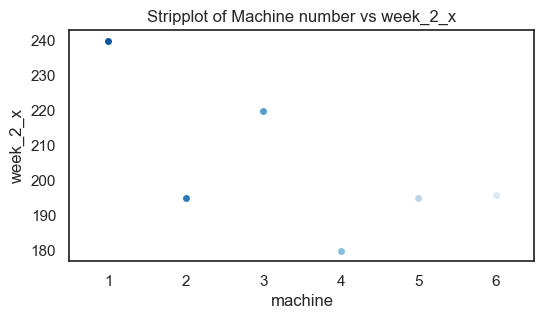

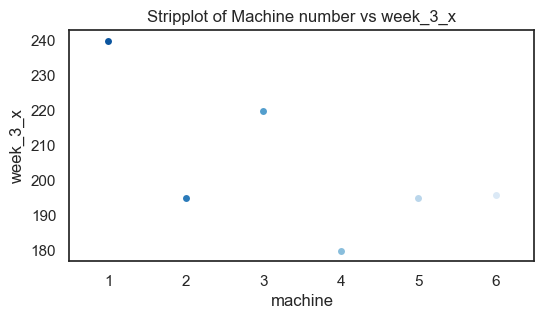

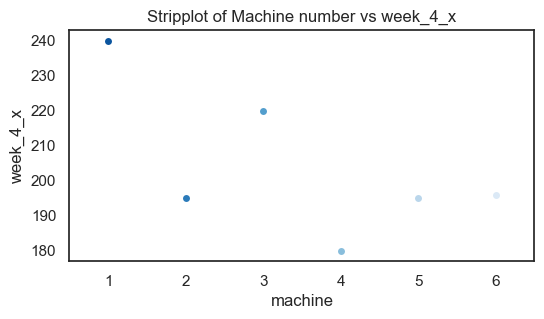

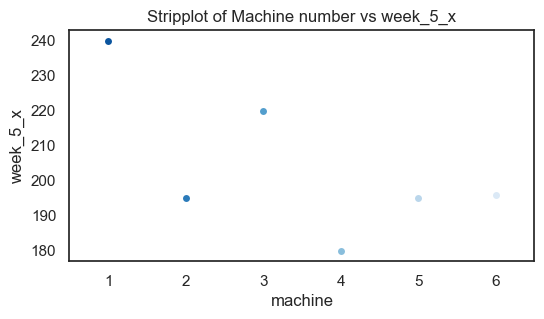

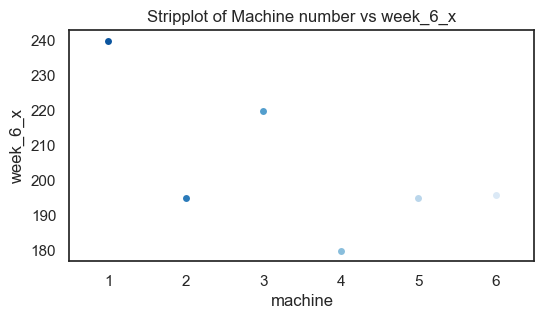

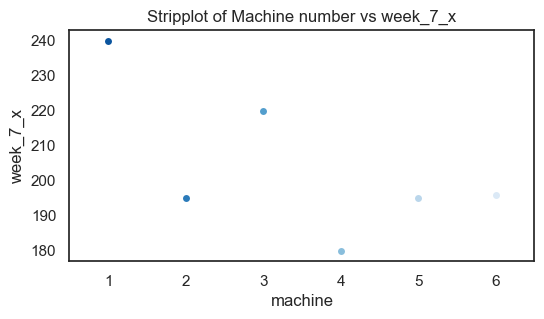

In [35]:
# col names with dependant var removed
y = df_test_ct_mins.columns[[1]].tolist() + df_test_ct_mins.columns[[3]].tolist() + df_test_ct_mins.columns[[5]].tolist() + df_test_ct_mins.columns[[7]].tolist() + df_test_ct_mins.columns[[9]].tolist() + df_test_ct_mins.columns[[11]].tolist() + df_test_ct_mins.columns[[13]].tolist()
# col name of dependant var
x = df_test_ct_mins.columns[0]
strip_plots(x, y, df_test_ct_mins)

We can see that timeframe (week) does not change the values, but they do change from machine to machine. 

In [36]:
df_test_capacity

,week,demand,capacity,backlog
0,1,1400,776,624
1,2,1400,776,1248
2,3,1400,776,1872
3,4,1400,776,2496
4,5,1400,776,3120
5,6,1400,776,3744
6,PANIC,1400,776,4368


In [37]:
df_test_capacity
print(df_test_capacity.columns)

Index(['week', 'demand', 'capacity', 'backlog'], dtype='object')


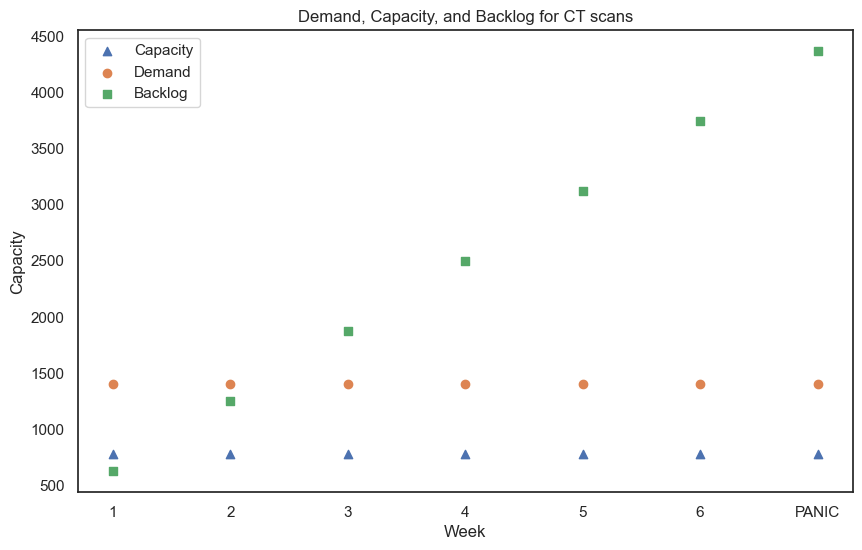

In [38]:
# Plotting demand vs capacity vs backlog per week in df_test_capacity
def plot_demand_capacity_backlog(df):
    plt.figure(figsize=(10, 6))
    plt.title('Demand, Capacity, and Backlog for CT scans')
    plt.xlabel('Week')
    plt.ylabel('Capacity')
    # Plot capacity
    plt.scatter(df['week'], df['capacity'], label='Capacity', marker='^')
    # Plot demand
    plt.scatter(df['week'], df['demand'], label='Demand', marker='o')
    # Plot backlog
    plt.scatter(df['week'], df['backlog'], label='Backlog', marker='s')
    plt.legend()
    plt.show()

plot_demand_capacity_backlog(df_test_capacity)

We see in the above graph that capacity remains constant, while demand also remains constantly above capacity which explains why backlog increases in a linear direction upwards across time. 

Why is Week 7 called 'panic'?